In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [104]:
Financials = pd.read_csv("/Users/sa20/Desktop/Fraud-Detection-Lab/Data/raws.csv")
Financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [105]:
Financials.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [106]:
Financials.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [107]:

Financials.rename(columns={'oldbalanceDest': 'OldDest', 
                           'newbalanceDest': 'NewDest', 
                           'oldbalanceOrg' : 'OldOrig',
                           'newbalanceOrig': 'NewOrig',
                           'amount' : 'Amount',
                           'isFraud' : 'Fraud'}, inplace=True)


In [108]:
Financials.isna().count() 

step              6362620
type              6362620
Amount            6362620
nameOrig          6362620
OldOrig           6362620
NewOrig           6362620
nameDest          6362620
OldDest           6362620
NewDest           6362620
Fraud             6362620
isFlaggedFraud    6362620
dtype: int64

In [109]:
Financials.shape

(6362620, 11)

##### So far, it's clear that I'm working with a large dataset that classifies transactions as fraudulent or non-fraudulent. So I want to focus  on isFraud and the isFlaggedFraud columns. As I proceed and dive deeper into this dataset I want to uncover further insights

# Univariate Analysis

In [110]:
random_sample = Financials.sample(n=100000, random_state=42)

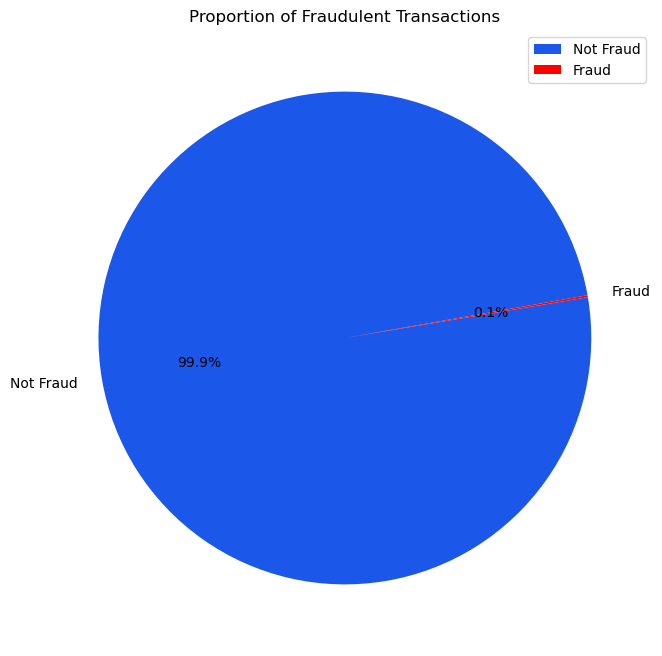

In [111]:
fraud_counts = Financials['Fraud'].value_counts()
fraud_counts = Financials['Fraud'].map({1: 'Fraud', 0: 'Not Fraud'}).value_counts()
explode = [0.1 if label == 1 else 0 for label in fraud_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=10, colors=['#1b57e9', 'red'])
plt.title('Proportion of Fraudulent Transactions')
plt.legend(['Not Fraud', 'Fraud'])
plt.show()


In [132]:
Financials['Fraud'].value_counts()

Fraud
0    6354407
1       8213
Name: count, dtype: int64

##### 8,213 out of 6.3 million rows are classified as fraudulent, so that means i'm dealing with a strong class imbalance. This will require attention during the modeling proccess to ensure more accurate fraud detection

<Axes: >

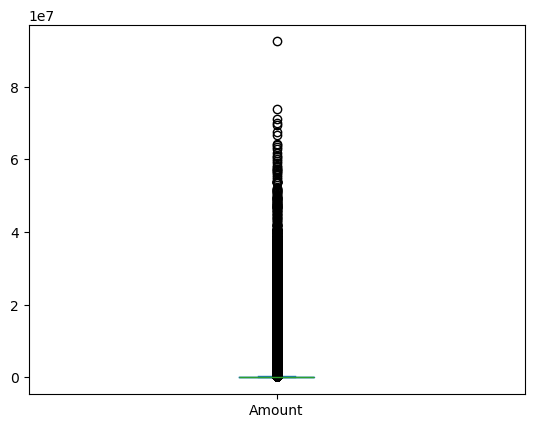

In [138]:
Financials['Amount'].plot.box()

<Axes: >

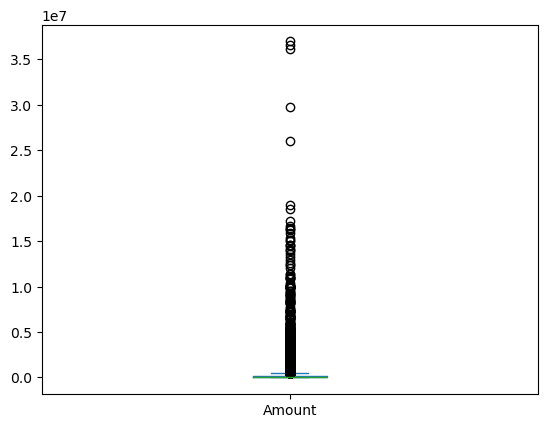

In [139]:
random_sample['Amount'].plot.box()

<function matplotlib.pyplot.show(close=None, block=None)>

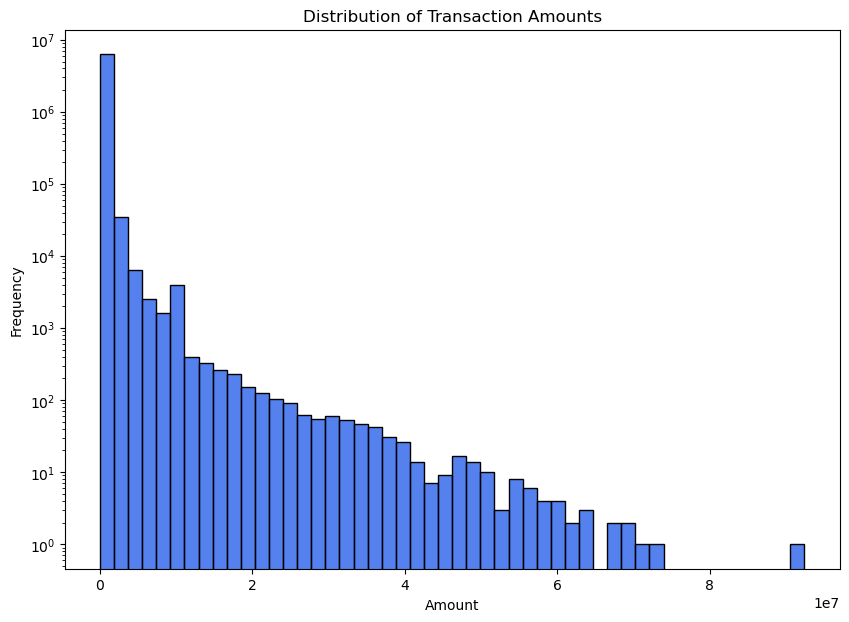

In [131]:
# Let's take a look at the 'Distribution of Transaction Amounts'
plt.figure(figsize=(10,7))
sns.histplot(Financials['Amount'], bins=50, kde=False, color='#1b57e9')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show

#### I want to further examine the distribution of transaction amounts for both fraudelent and non-fruadelent transactions types

<Axes: xlabel='type'>

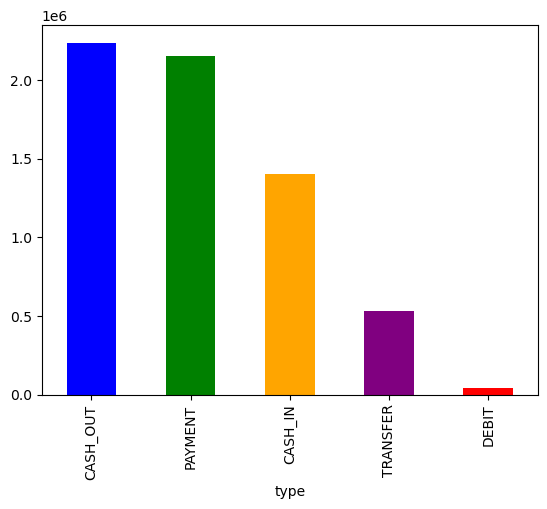

In [113]:
transaction_type = Financials['type'].value_counts()
colors = ['blue', 'green', 'orange', 'purple', 'red']
transaction_type.plot.bar(color=colors)

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

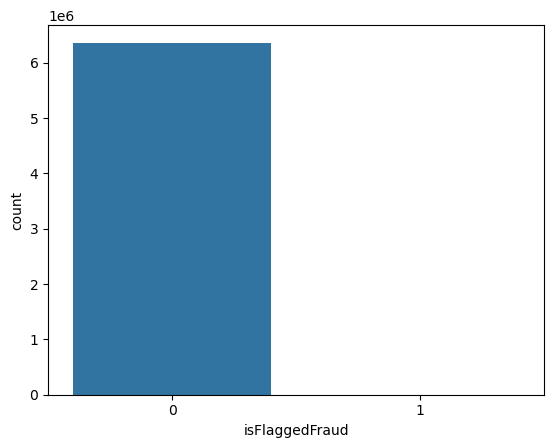

In [114]:
sns.countplot(x='isFlaggedFraud', data=Financials)

#### During my initial analysis, I noticed that I never investigated 'isFlaggedFraud'. So after revisiting this section, it makes me wonder if this column is necessary as this visualization makes 'isFlaggedFraud' seem very unbalanced.

In [115]:
# Get value counts for the 'isFlaggedFraud' column
Flagged_Fraud = Financials['isFlaggedFraud'].value_counts()

# Print value counts
print(Flagged_Fraud)


isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


#### The value counts only further emphasize the extreme imbalance found in the 'IsFlaggedFraud' column. From this we can infer that this column can be dropped when cleaning up the data, as it will most likely not provide any noteworthy insight

#### I now want to focus on actual fraudulent transactions in the dataset in order to better understand the relationship between transaction types and fraud. My goal is to examine how different transaction types are distributed between fraudulent and non-fraudulent transactions.

# Bivariate Analysis

<Axes: xlabel='type', ylabel='count'>

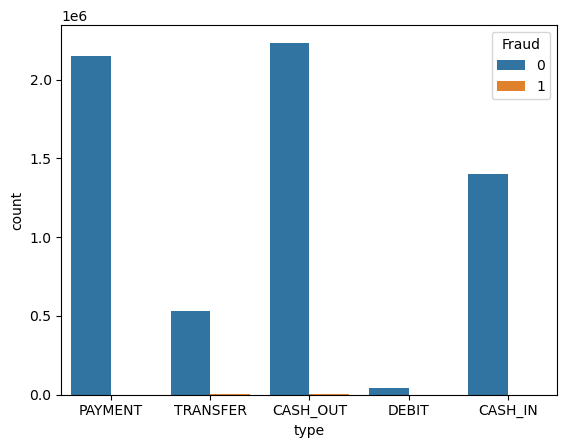

In [116]:
sns.countplot(x='type', data=Financials, hue='Fraud')

<Axes: xlabel='type', ylabel='count'>

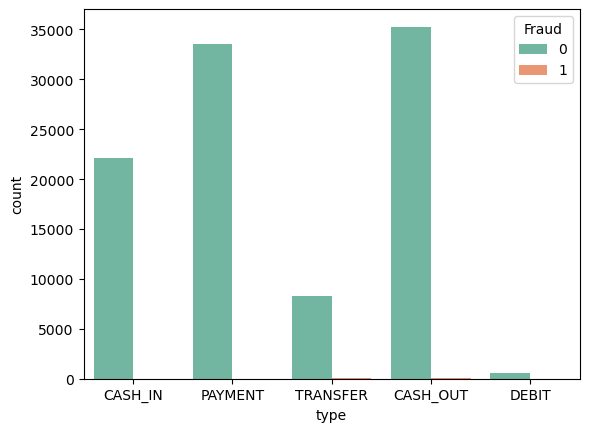

In [117]:
sns.countplot(x='type', data=random_sample, hue='Fraud', palette='Set2')

#### Before proceeding, I want to eliminate any shred of doubt to ensure that there are no significant differences in the results across transaction types when referencing my random sample

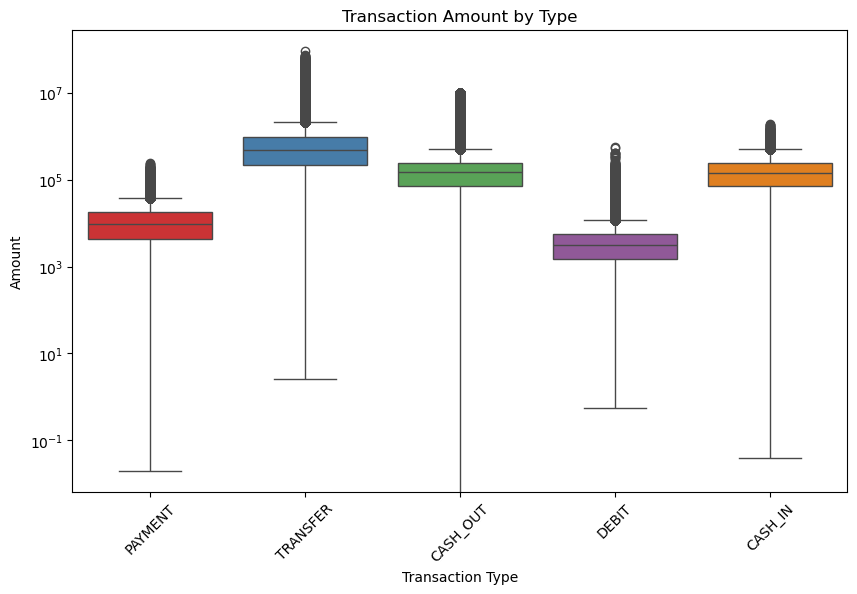

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='Amount', data=Financials, hue='type', palette='Set1')
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

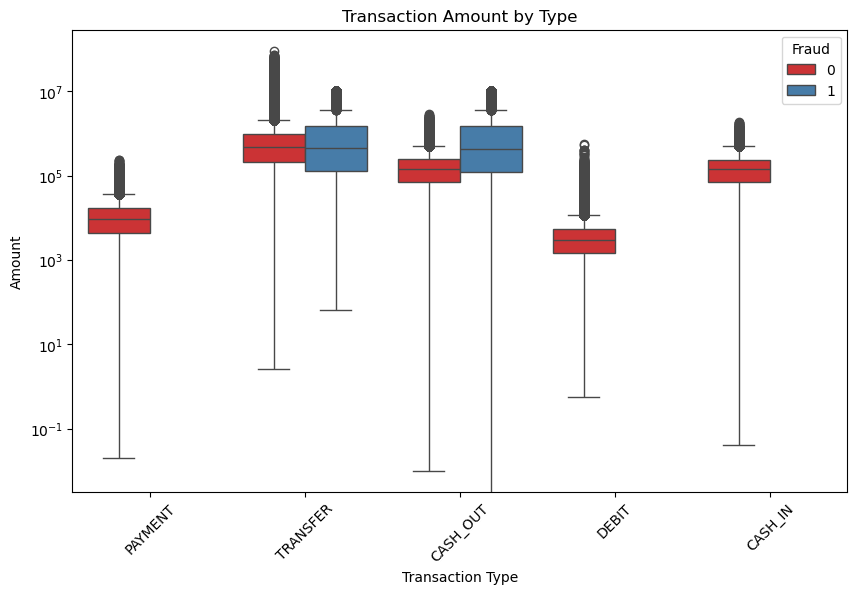

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='Amount', data=Financials, hue='Fraud', palette='Set1')
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

#### Fraudulent activity was detected in TRANSFER and CASH_OUT, which leads me to believe that PAYMENT, DEBIT, and CASH_IN should be dropped

In [120]:
Cash_Out = Financials[Financials['type']=='CASH_OUT']
Transfers = Financials[Financials['type'] == 'TRANSFER']

In [121]:
Cash_Out

,step,type,Amount,nameOrig,OldOrig,NewOrig,nameDest,OldDest,NewDest,Fraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [122]:
Transfers

,step,type,Amount,nameOrig,OldOrig,NewOrig,nameDest,OldDest,NewDest,Fraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


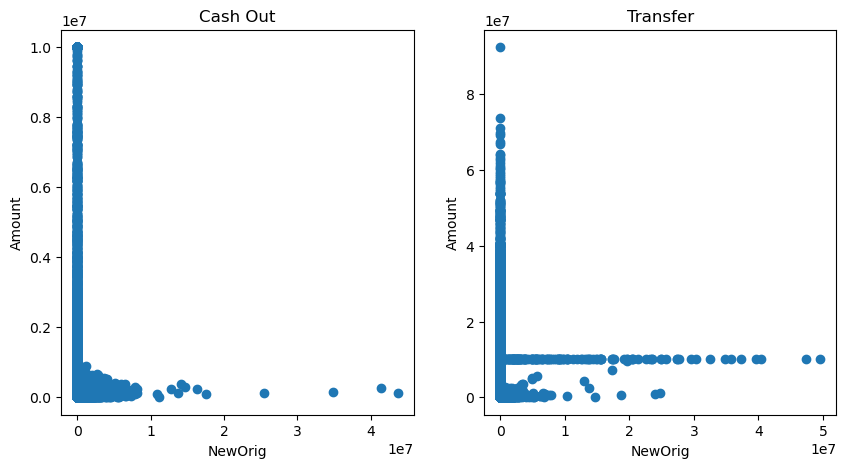

In [123]:
plt.figure(figsize=(10, 5)) # Adjust figure size as needed
plt.tight_layout() # Adjusts subplot parameters for a tight layout
plt.subplot(1, 2, 1)  # First subplot (2 row, 2 columns, 1st position)
plt.scatter(Cash_Out['NewOrig'], Cash_Out['Amount'])
plt.xlabel('NewOrig')
plt.ylabel('Amount')
plt.title('Cash Out')

plt.subplot(1, 2, 2)  # Second subplot (2 row, 2 columns, 2nd position)
plt.scatter(Transfers['NewOrig'], Transfers['Amount'])
plt.xlabel('NewOrig')
plt.ylabel('Amount')
plt.title('Transfer')

# Show the plot
plt.show()

##### These plots demonstrate that there is a noticeable difference in the Transfer plot since it displays a high concentration at a value of 1, which forms a straight line. In comparison, the Cash Out plot shows a more varied distribution, as the data points are packed close togther, which indicates a greater spread of transaction amounts

##### I want to expand on my observations and investigate a potential collinearity between the Fraud and IsFlaggedFraud variables. Why? As these two columns may be related as they both indicate fraudulent transactions. By doing so, this will help me understand if one of these features can be excluded from further modeling and remove any excess

<Axes: xlabel='Fraud', ylabel='isFlaggedFraud'>

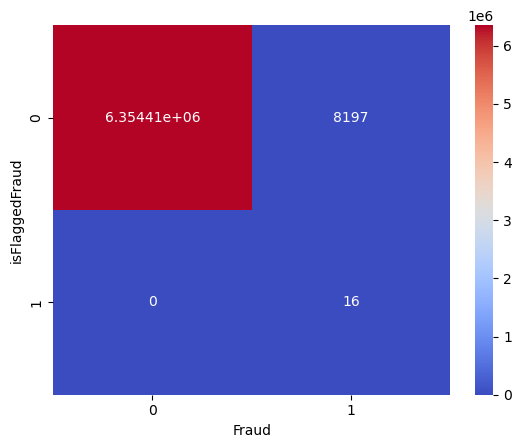

In [124]:
# Create a crosstab to show relationship between 'isFlaggedFraud and 'Fraud'
Fraud_HM = pd.crosstab(Financials['isFlaggedFraud'], Financials['Fraud'])

# Generate heatmap
sns.heatmap(Fraud_HM, annot=True, cmap='coolwarm', fmt='g')


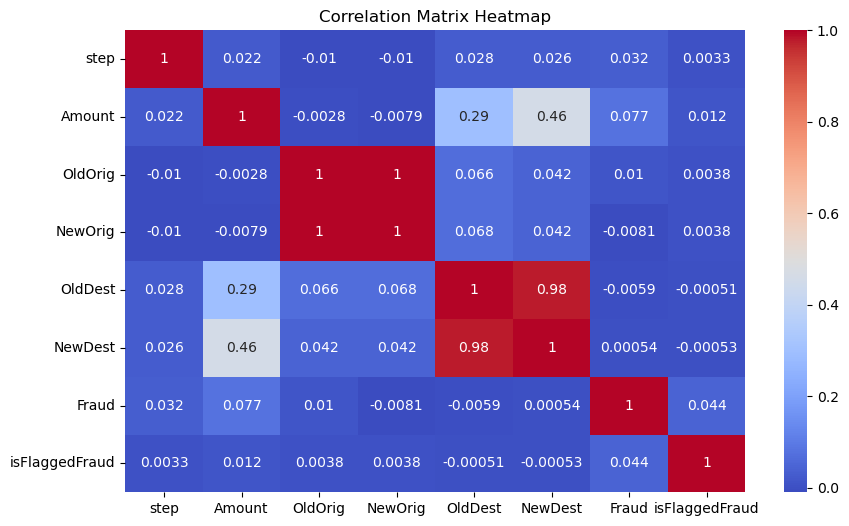

In [125]:
# Calculate correlation matrix
corr_matrix = Financials.corr(numeric_only=True)

# Let's generate a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

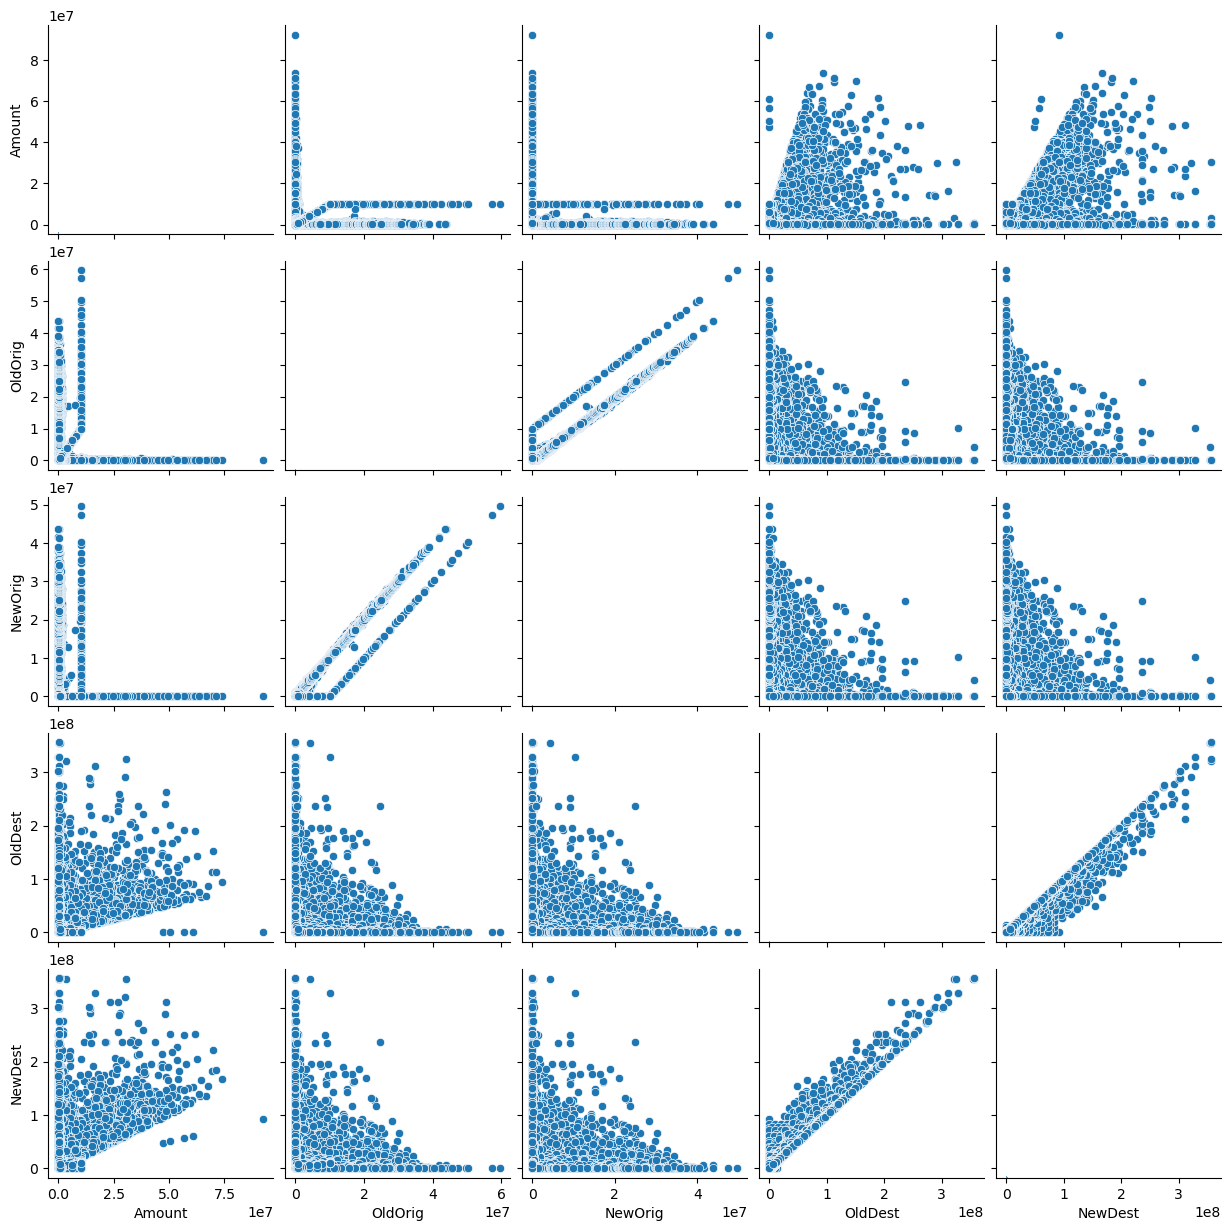

In [126]:
# Select a subset of features for analysis
Features = ['Amount', 'OldOrig', 'NewOrig', 'OldDest', 'NewDest'] # Example subset

# Create a pairplot using the chosen features
sns.pairplot(Financials[Features])
plt.show()

##### From my results, I can see that isFlaggedFraud is effective when it comes to detecting non-fraudulent cases but struggles identfying the more rare fraudulent cases.  Many fraudulent transactions are not flagged, which suggests that the fraud flagging system needs to be refined or removed completely during my data cleaning

##### As I move onto the final phase of my Analysis, my aim is to build onto my findings and explore how 'Amount', 'OldDest', 'NewDest', and 'NewOrig' in relation to fraud, as it could potentially reveal any remaining patterns or clusters which will be needed in order to improve fraud detection

## Multivariate Analysis

In [127]:
# Check for missing values in the selected columns
print(Financials[['Amount','NewOrig','NewDest','OldDest','Fraud']].isnull().sum())

Amount     0
NewOrig    0
NewDest    0
OldDest    0
Fraud      0
dtype: int64


<Axes: xlabel='Amount', ylabel='NewDest'>

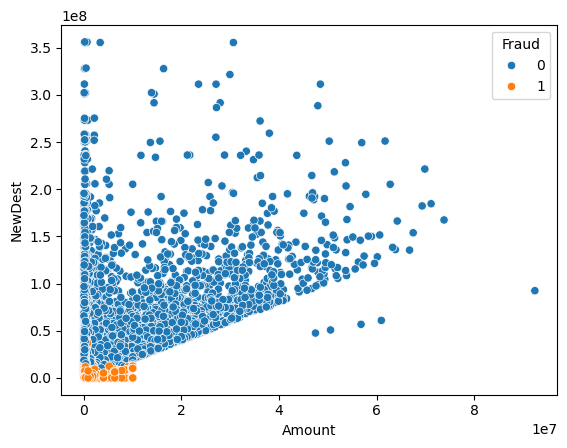

In [128]:
# Create a scatterplot using 'Amount' vs 'NewDest' with 'Fraud' as your hue
sns.scatterplot(data=Financials, x='Amount', y='NewDest', hue='Fraud')

<Axes: xlabel='Amount', ylabel='NewDest'>

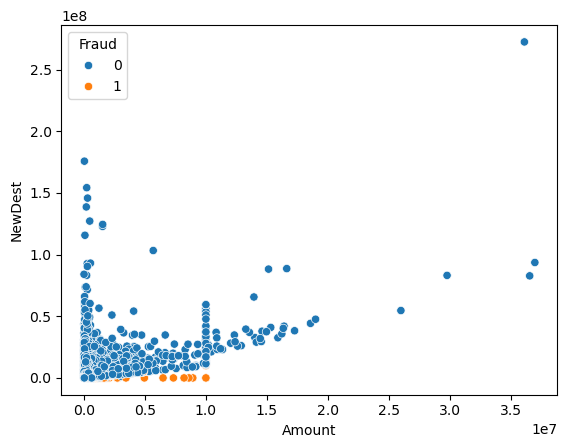

In [133]:
sns.scatterplot(data=random_sample, x='Amount', y='NewDest', hue='Fraud')

<Axes: xlabel='Amount', ylabel='NewOrig'>

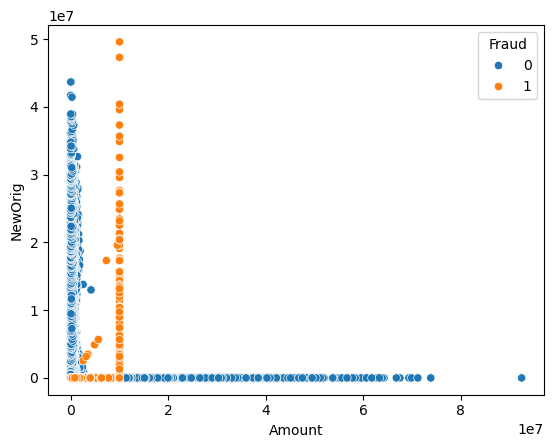

In [129]:
# Repeat the process but replace 'NewDest' with 'NewOrig'
sns.scatterplot(data=Financials, x="Amount", y="NewOrig", hue ="Fraud")

<Axes: xlabel='Amount', ylabel='NewOrig'>

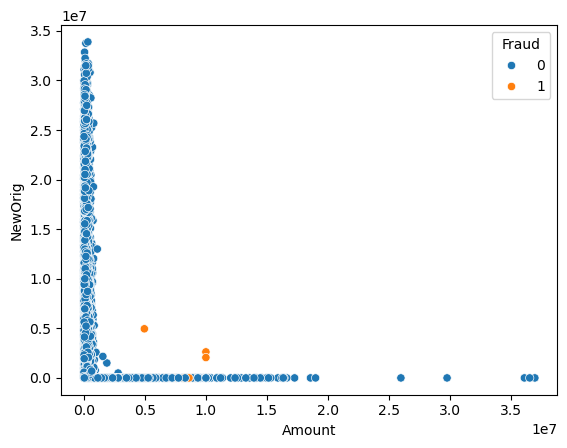

In [134]:
sns.scatterplot(data=random_sample, x="Amount", y="NewOrig", hue ="Fraud")

<Axes: xlabel='Amount', ylabel='OldDest'>

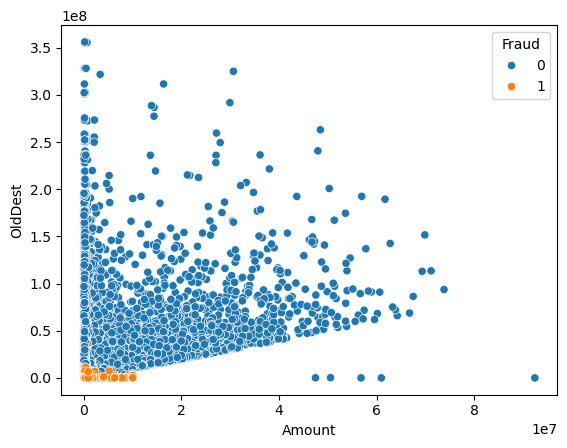

In [130]:
# Repeat the process but replace 'NewOrig' with 'OldDest
sns.scatterplot(data=Financials, x='Amount', y='OldDest', hue='Fraud')

<Axes: xlabel='Amount', ylabel='OldDest'>

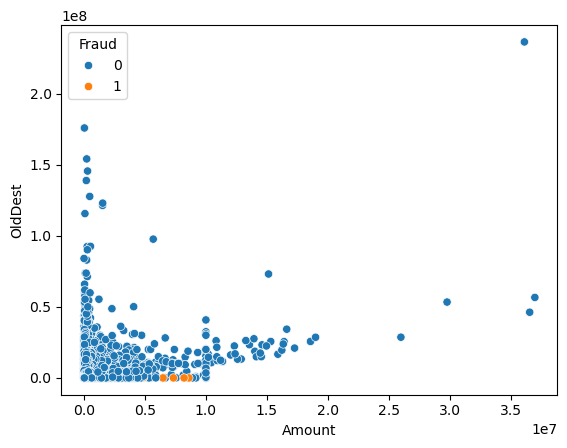

In [135]:
sns.scatterplot(data=random_sample, x='Amount', y='OldDest', hue='Fraud')

## Conclusion 

#### These scatterplots only further reinforce that fraudulent transactions tend to involve amounts with more significant changes between balances, while non-fraudulent transactions appear more stable with less changes.

#### After an extensive process with the aim of leaving no stone unturned, I was able to observe several outliers and typically, outliers should be removed for more clarity. But my bivariate analysis made me realize that these outliers are important for future modeling. So, I will no longer be removing them as I intially stated (e.g Boxplot 'Transaction Amount by Type')